# MODELO SERIES DE TIEMPO (Ethereum)



* Rojas Ramírez Diego Andrés

### Descripción del set de datos
Este conjunto de datos tiene la información histórica de precios de algunas de las principales criptomonedas por capitalización de mercado, para este estudio analizaremos Ethereum

Contenido y explicacion de cada variable:

* SNo: Número de serie, es un identificador único asignado a cada fila del conjunto de datos.
* Name: El nombre completo de la criptomoneda, en este caso Ethereum.
* Symbol: El símbolo que se utiliza para representar la criptomoneda, en este caso ETH.
* Date: La fecha a la que corresponde la información del resto de las columnas.
* High: El precio máximo registrado de la criptomoneda en esa fecha.
* Low: El precio mínimo registrado de la criptomoneda en esa fecha.
* Open: El precio de apertura de la criptomoneda en esa fecha.
* Close: El precio de cierre de la criptomoneda en esa fecha.
* Volume: El volumen total de criptomonedas que se intercambiaron en esa fecha.
* Marketcap: La capitalización de mercado total de la criptomoneda en esa fecha.
---
Target: Close

El precio de cierre es importante porque refleja el consenso del mercado al final del período en cuestión. Muchos analistas técnicos y seguidores de tendencias utilizan el precio de cierre para trazar gráficos y realizar análisis técnicos, lo que les permite identificar patrones y tendencias en el precio de Ethereum.



In [ ]:
!git clone https://github.com/JairAmaroSantiago/cripto.git

fatal: destination path 'cripto' already exists and is not an empty directory.


In [ ]:
### Dependencias
import pandas as pd
import numpy as np
import statsmodels.tsa.arima.model
import sklearn as sk
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Lee el archivo CSV
df = pd.read_csv('/content/cripto/coin_Ethereum.csv',parse_dates=['Date'])

# Establece la columna 'Date' como el índice del DataFrame
df = df.set_index('Date')

# Ordena el DataFrame por el índice en orden ascendente
df.sort_index(inplace=True)

# Muestra las primeras filas del DataFrame
df.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2015-08-08 23:59:59,1,Ethereum,ETH,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
2015-08-09 23:59:59,2,Ethereum,ETH,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2015-08-10 23:59:59,3,Ethereum,ETH,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
2015-08-11 23:59:59,4,Ethereum,ETH,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
2015-08-12 23:59:59,5,Ethereum,ETH,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [ ]:
# Lee el archivo CSV
df2 = pd.read_csv('/content/cripto/ETH-USD.csv',parse_dates=['Date'])

# Establece la columna 'Date' como el índice del DataFrame
df2 = df2.set_index('Date')

# Ordena el DataFrame por el índice en orden ascendente
df2.sort_index(inplace=True)

# Muestra las primeras filas del DataFrame
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-06,2197.919434,2346.294922,2197.919434,2324.679443,2324.679443,20891861314
2021-07-07,2323.208496,2403.773438,2298.026855,2315.161865,2315.161865,22398345285
2021-07-08,2317.949219,2324.006836,2089.414307,2120.026367,2120.026367,23188123689
2021-07-09,2115.573975,2185.376221,2051.066650,2146.692383,2146.692383,23029574602
2021-07-10,2146.999756,2190.124023,2081.923584,2111.403564,2111.403564,17581542471


In [ ]:
df.shape

(2160, 9)

In [ ]:
df2.shape

(63, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2160 entries, 2015-08-08 23:59:59 to 2021-07-06 23:59:59
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   High       2160 non-null   float64
 4   Low        2160 non-null   float64
 5   Open       2160 non-null   float64
 6   Close      2160 non-null   float64
 7   Volume     2160 non-null   float64
 8   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 168.8+ KB


#Análisis de la serie temporal

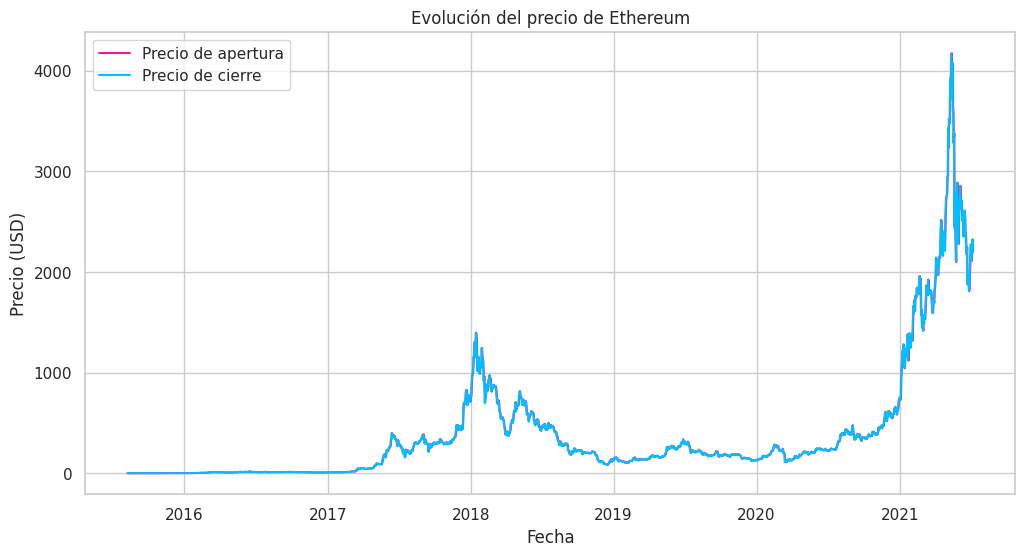

In [ ]:
# Crear una figura y un eje, ploteamos el plano
fig, ax = plt.subplots(figsize=(12, 6))

# Agregar los datos de precios de apertura y cierre a la gráfica conforme a la fecha
ax.plot(df['Open'], label='Precio de apertura',color='deeppink')
ax.plot(df['Close'], label='Precio de cierre',color='deepskyblue')

# Agregar etiquetas y leyenda
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio (USD)')
ax.set_title('Evolución del precio de Ethereum')
ax.legend()
plt.style.use('dark_background')
# Mostrar la gráfica
plt.show()


### Podemos observar que existe cierta tendencia creciente en la serie a lo largo del tiempo ,que si bien ha tenido varias caídas importantes en el transcurso del año 2018, se ha logrado recuperar en los siguientes 3 años teniendo una subida de precio bastante fuerte en el año 2021 y volviendo a caer en el mismo año.
### De igual forma notamos que la serie no es estacionaria a simple vista, ya que tiene importantes variaciones en periodos relativamente cortos de tiempo.
### Sí analizamos a detalle la serie podemos detectar cierto patrón de  estacionalidad, ya que cada 6 meses parece haber un movimiento importante en el comportamiento del precio, ya sea una subída o caída importante en el precio del activo, lo cuál lo hace volátil en el corto plazo.
### Con ello podemos pensar en proponer un modelo estacionario , que tome rezagos de manera semestral.

<Axes: xlabel='Date', ylabel='High'>

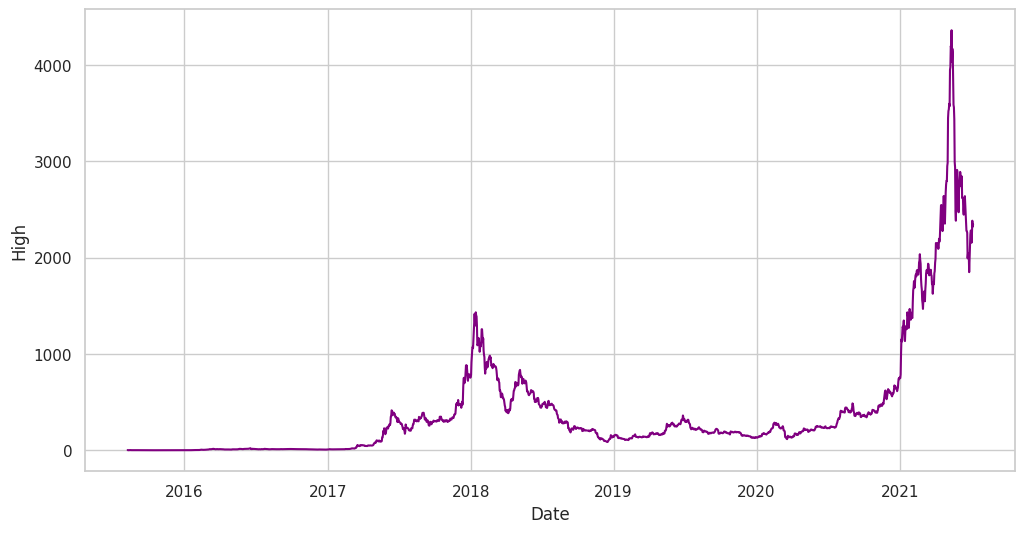

In [ ]:
# Veamos los precios más altos
sns.set(style='whitegrid')
plt.subplots(figsize = (12,6))
sns.lineplot(x = 'Date', y = 'High', data = df, color = 'purple')

### Consideramos que la serie se mantuvo constante entre el año 2019 y 2020, por lo que tomaremos la serie a partir del año 2020.

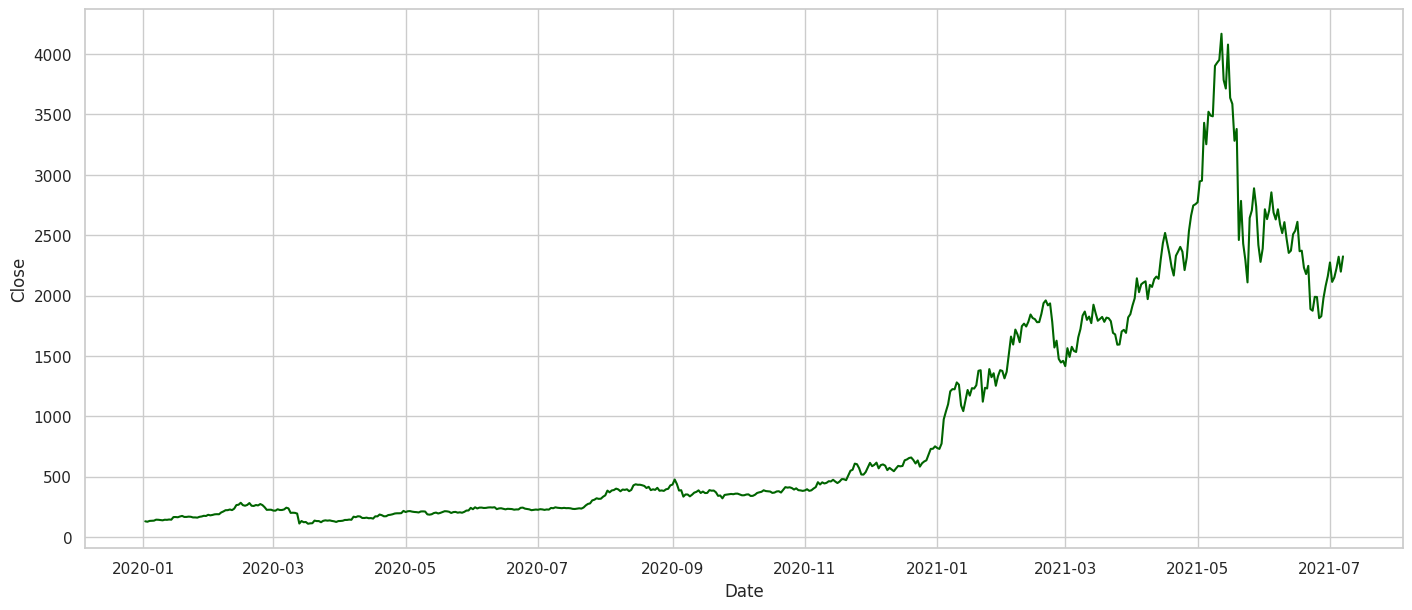

In [ ]:
############################################################
# Tomaremos una muestra a partir del 2020-01-01 al 2021-07-06 #
############################################################

ETH_coint_select=df.loc['2020-01-01':'2021-07-06']
#(start='2020-01-01', end='2021-07-06')
fig,ax = plt.subplots(figsize = (17,7))
sns.lineplot(x = 'Date', y = 'Close', data = ETH_coint_select,color = 'darkgreen')
plt.show()

##Análisis Estadítico y Visual
A continuación mostraremos 6 gráficas de los datos de nuestra serie de tiempo netamente cruda (aún sin aplicar la metodologia Box-Jenkins) comparando desde periodos trimestrales, semestrales y anuales de como se comporta tanto cuando abre y como cierra la cripto ether respecto a la media y varianza. La linea rosa representa (para todas las gráficas como abre o cierra respectivamente) la linea azul la media de la serie de tiempo y la linea verde la varianza.

Notamos que los datos se comportan de formas muy similares para todos los periodos ya mencionados, se observa una tendencia lineal para la media en ambos casos(open, close), notemos que la varianza no tiene una tendendencia, pero ojo, es preferible trabajar primeramente con la heteroscedasticidad (varianza no es constante) porque puede resultar engañosa, ya que si primero trabajamos con la tendencia puede ser que nuestra serie de tiempo no se estabilize, es decir, aplicaremos primeramente una transformación (raiz cuadrada, logaritmo o inverso) para estabilizar la varianza, y despues aplicaremos diferencias para eliminar la tendencia de nuestra serie.

Por otra parte notemos que a partir del año 2021 la serie comienza a tener mayor volatilidad y presenta una tendencia cada vez más creciente y por tanto vemos que en la linea verde (nuestra varianza de los datos comienza a fluctuar más), esto es, se nota que cada vez hay más picos pronunicados.

Por tanto haciendo una supusición meramente acádemica, dada nuestra serie de tiempo, nosotros queremos estimar el valor de la serie en el timpo t+j dada la información en el timpo t=2021 y además la varianza, es decir la volatilidad del modelo (medir el nivel de significación). Así nuestro objetivo será realizar un bueno modelo que se ajuste correctamente a los datos, más aún, el realizar pronósticos contables.



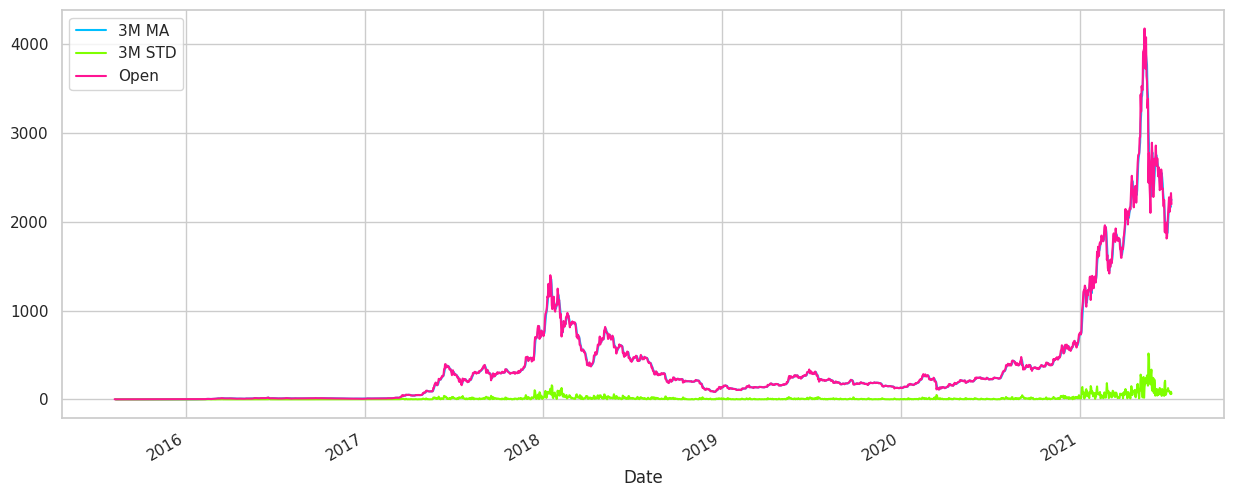

In [ ]:
df['Open'].rolling(3).mean().plot(label="3M MA",figsize=(15,6),color='deepskyblue')
df['Open'].rolling(3).std().plot(label="3M STD",color='chartreuse')
df['Open'].plot(label="Open",color='deeppink')
plt.legend()

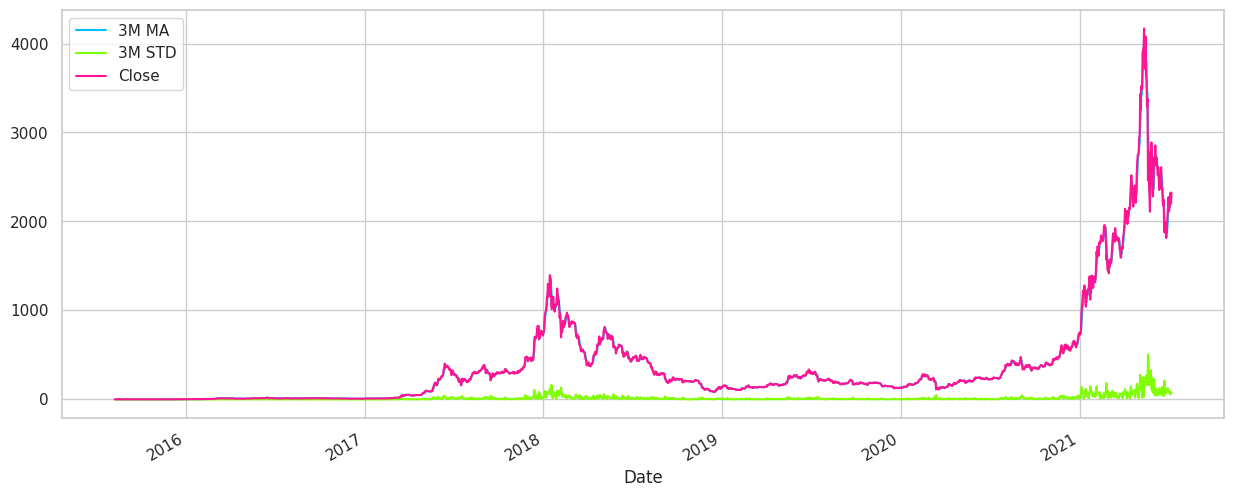

In [ ]:
df['Close'].rolling(3).mean().plot(label="3M MA",figsize=(15,6),color='deepskyblue')
df['Close'].rolling(3).std().plot(label="3M STD",color='chartreuse')
df['Close'].plot(label="Close",color='deeppink')
plt.legend()

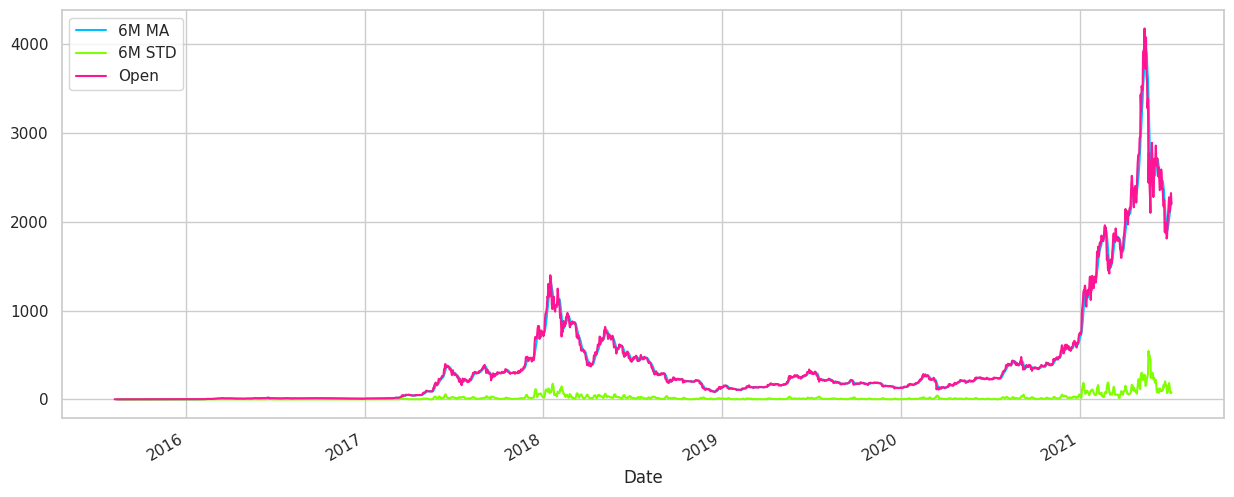

In [ ]:
df['Open'].rolling(6).mean().plot(label="6M MA",figsize=(15,6),color='deepskyblue')
df['Open'].rolling(6).std().plot(label="6M STD",color='chartreuse')
df['Open'].plot(label="Open",color='deeppink')
plt.legend()

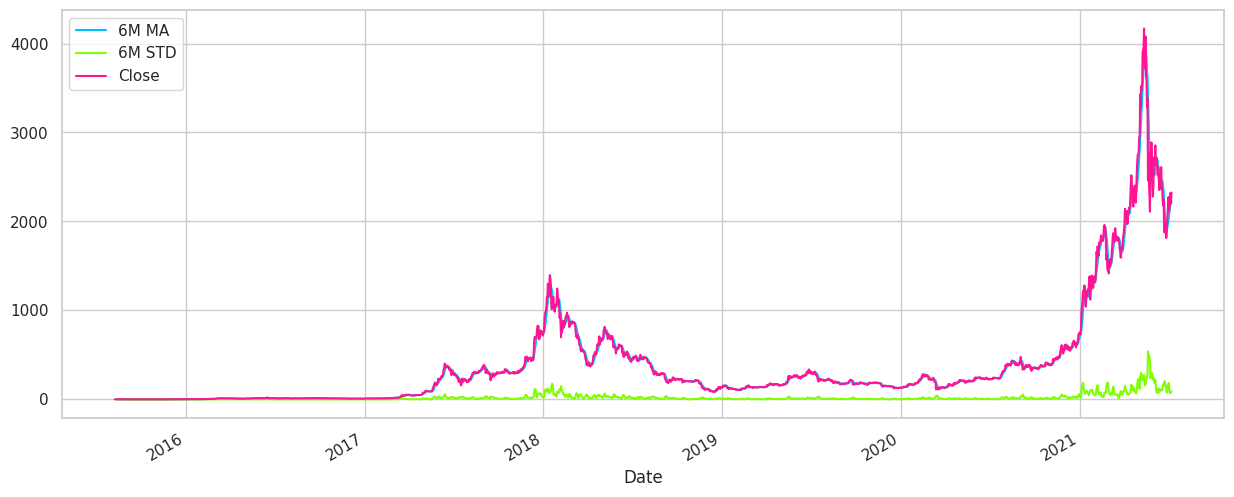

In [ ]:
df['Close'].rolling(6).mean().plot(label="6M MA",figsize=(15,6),color='deepskyblue')
df['Close'].rolling(6).std().plot(label="6M STD",color='chartreuse')
df['Close'].plot(label="Close",color='deeppink')
plt.legend()

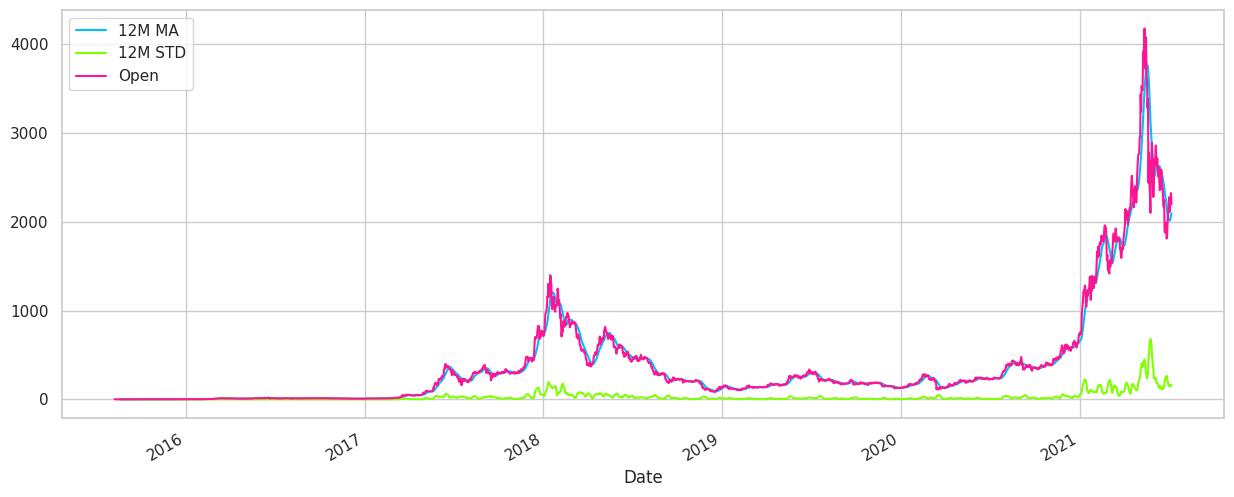

In [ ]:
df['Open'].rolling(12).mean().plot(label="12M MA",figsize=(15,6),color='deepskyblue')
df['Open'].rolling(12).std().plot(label="12M STD",color='chartreuse')
df['Open'].plot(label="Open",color='deeppink')
plt.legend()

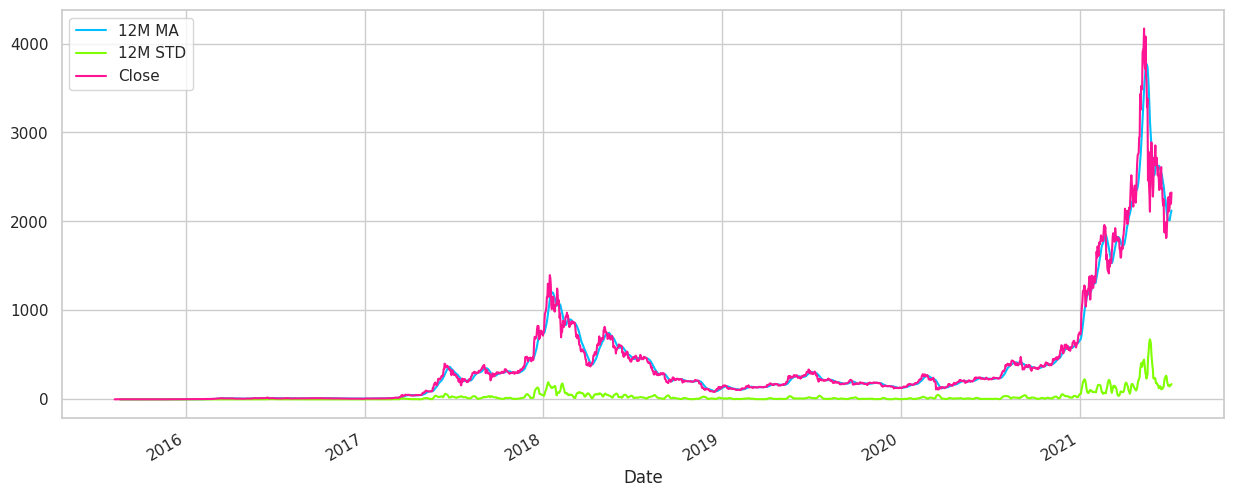

In [ ]:
df['Close'].rolling(12).mean().plot(label="12M MA",figsize=(15,6),color='deepskyblue')
df['Close'].rolling(12).std().plot(label="12M STD",color='chartreuse')
df['Close'].plot(label="Close",color='deeppink')
plt.legend()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

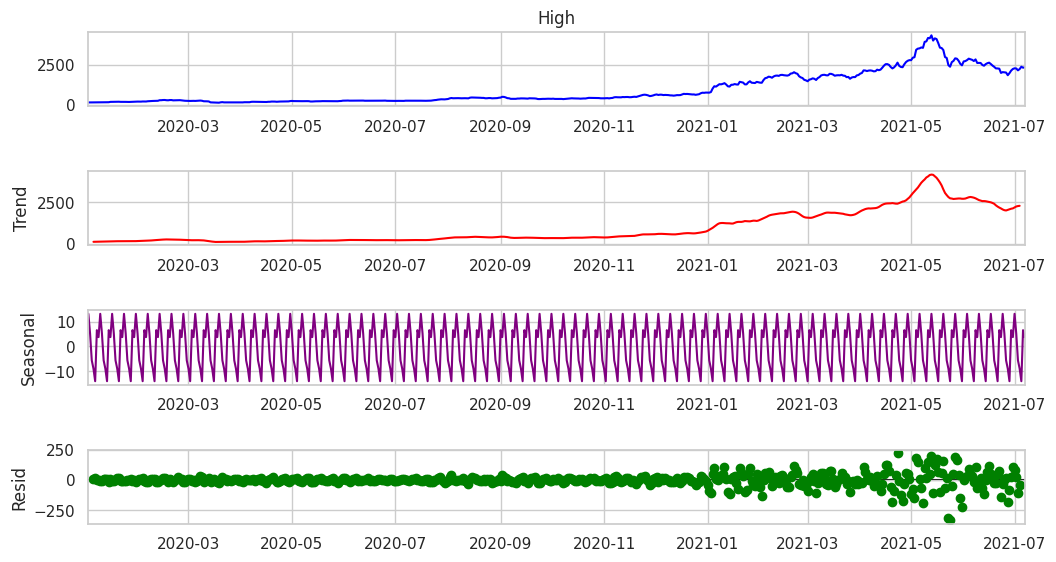

In [ ]:
decomp = seasonal_decompose(ETH_coint_select['High'])
fig = decomp.plot()
fig.set_size_inches(12, 6)

# Obtener los ejes individuales
ax_trend = fig.axes[0]
ax_seasonal = fig.axes[1]
ax_residual = fig.axes[2]
ax_resid=fig.axes[3]

# Cambiar los colores de las gráficas individuales
ax_trend.lines[0].set_color('blue')
ax_seasonal.lines[0].set_color('red')
ax_residual.lines[0].set_color('purple')
ax_resid.lines[0].set_color('green')

###Como habíamos comentado , observamos una tendencia creciente en la serie .
###Observamos que la serie no se comporta de manera estacionaria, por lo cuál sería una buena idea aplicarle algúna transformación para estacionalizar la varianza, quizás con el logaritmo.
###Por otro lado los residuos muestran un comportamiento bastante bueno o estacionario hasta antes del 2021, después empieza a haber un poco más de dispersión.


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
fuller_test=adfuller(ETH_coint_select['Close'])
fuller_test

(-0.434025333195422,
 0.9042608905084895,
 16,
 536,
 {'1%': -3.442609129942274,
  '5%': -2.866947348175723,
  '10%': -2.569649926626197},
 6238.765879707585)

In [ ]:
def test_p_vale(data):
  fuller_test=adfuller(data)
  print('P-value',fuller_test[1])
  print('*------------------------------------------------------*')
  if fuller_test[1]<0.01:
    print('rechazar hipotesis nula, los datos son estacionales')
  else:
    print('no rechazar la hipotesis nula, los datos no son estacionarios')

test_p_vale(ETH_coint_select['Close'])

P-value 0.9042608905084895
*------------------------------------------------------*
no rechazar la hipotesis nula, los datos no son estacionarios


###Al hacer la prueba de Dicky Fuller obtenemos lo que ya habíamos previsto, la serie no es estacionaria ya que optuvimos un p-value mayor a un nivel de significancia del 5%, con lo cuál no rechazamos la hipótesis , es decir no es estacionaria la serie.

In [ ]:
#Aplicamos una transformación logaritmica a la serie

ETH_coint_select['Log']=np.log(ETH_coint_select['Close'])

<ipython-input-97-1b59519553fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ETH_coint_select['Log']=np.log(ETH_coint_select['Close'])


<Axes: xlabel='Date'>

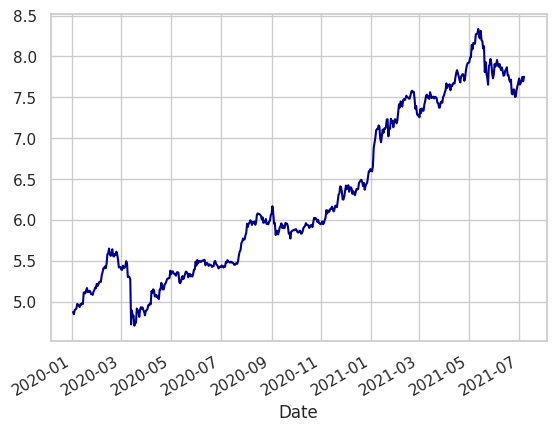

In [ ]:
# Trazar el gráfico de la serie de tiempo

ETH_coint_select['Log'].plot(color='darkblue')

###Al aplicar una transformación logaritmica a la serie , logramos suavizar la varianza y seguimos conservando puntos máximos y mínimos por propiedades del logaritmo.

<ipython-input-99-b01bec0d6e0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ETH_coint_select['1st_dif']=ETH_coint_select['Log']-ETH_coint_select['Log'].shift(1)


<Axes: xlabel='Date'>

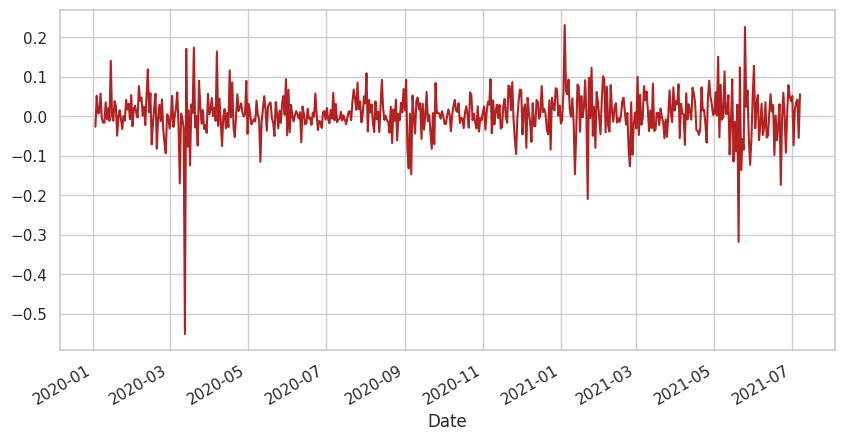

In [ ]:
# Realizar la diferencia de primer orden y asignarla a una nueva columna
ETH_coint_select['1st_dif']=ETH_coint_select['Log']-ETH_coint_select['Log'].shift(1)
# Trazar el gráfico de la serie de tiempo de la diferencia de primer orden
ETH_coint_select['1st_dif'].plot(color='firebrick', figsize=(10,5))

### Al aplicar 1 diferencia a nuestros datos ya transformados , observamos que la serie ya parece ser estacionaria y sin tendencia.

In [ ]:
test_p_vale(ETH_coint_select['1st_dif'].dropna())

P-value 3.838987591353829e-08
*------------------------------------------------------*
rechazar hipotesis nula, los datos son estacionales


### Despúes de aplicar una transformación y una diferencia logramos hacer los datos estacionarios.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

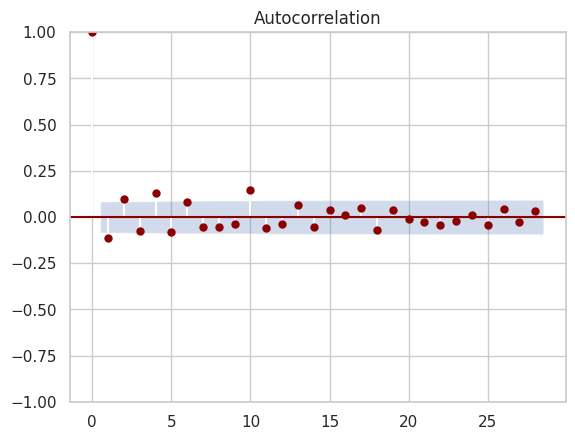

In [ ]:
first_diff=plot_acf(ETH_coint_select['1st_dif'].dropna(), color='darkred')

### Obtenemos la gráfica de la Función de Autocorrelación, y vemos que la mayoría de los rezagos se mantienen dentro de las bandas ,y parecen no seguir algpun patrón de estacionalidad, con excepción de los rezagos 1,2,3,4 y 10.
### Por lo que podemos proponer un modelo ARIMA(4,1,4) y uno SARIMA(1,1,1)(10,0,10)
### Donde los parámetros para el modelo ARIMA(p,d,q) representan:
### p : número de rezagos autoregresivos
### d : número de diferencias utilizadas
### q : número de rezagos de medias moviles

#Modelo

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

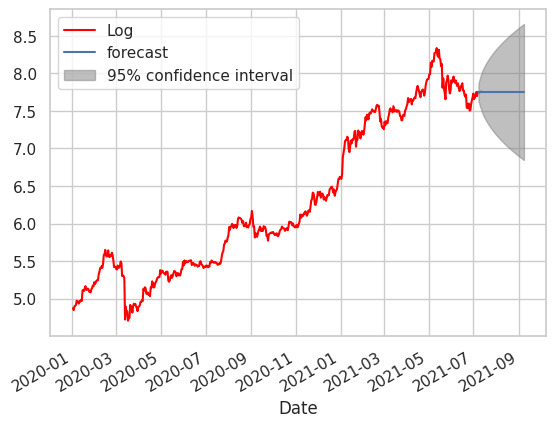

In [ ]:
#############################################################
# Entrenamos el modelo con información de 2020-01-01 al 2021-07-06 #
#############################################################

# Importar bibliotecas necesarias

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

#2020-01-01':'2021-07-06

# Ajustar el modelo ARIMA a la serie de tiempo
mod = ARIMA(ETH_coint_select['Log'],order = (4, 1, 4) )
res = mod.fit()
# Crear el gráfico
fig, ax = plt.subplots()
# Trazar la serie de tiempo original en rojo
ax = ETH_coint_select['Log'].loc['2020-01-01':].plot(ax=ax, color='red')
# Trazar las predicciones del modelo ARIMA
fig=plot_predict(res, start='2021-07-07', end='2021-09-07', ax=ax)
# Mostrar el gráfico
plt.show()

### Observamos que el modelo propuesto nos arroja un "mal" pronóstico, ya que permanece constante sin variaciones,por lo que decidimos intentar con un modelo SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


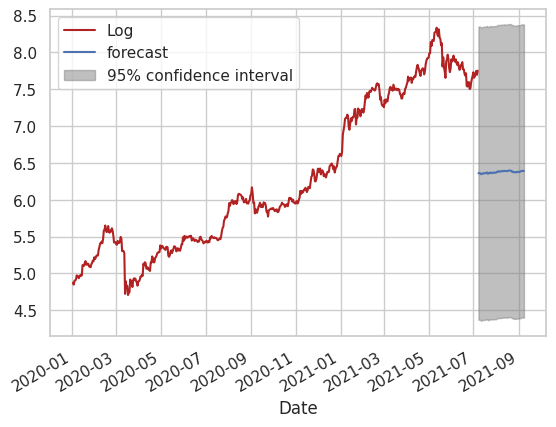

In [ ]:
#############################################################
# Entrenamos el modelo con información de 2020-01-01 al 2021-07-06 #
#############################################################

# Importar bibliotecas necesarias

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

#2020-01-01':'2021-07-06
# Ajustar el modelo ARIMA estacional a la serie de tiempo
mod = ARIMA(ETH_coint_select['Log'],seasonal_order = (1, 0, 0, 180) )
res = mod.fit()
fig, ax = plt.subplots()
# Trazar la serie de tiempo original en color rojo
ax = ETH_coint_select['Log'].loc['2020-01-01':].plot(ax=ax, color='firebrick')
# Trazar las predicciones del modelo ARIMA estacional
fig=plot_predict(res, start='2021-07-07', end='2021-09-07', ax=ax,color= 'purple')
plt.show()


### Obtenemos un pronóstico desfasado usando un rezago de orden 180, por lo que optamos por usar un rezago mensual

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


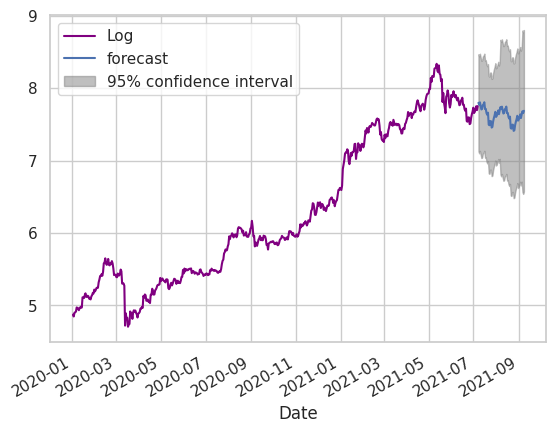

In [ ]:
#############################################################
# Entrenamos el modelo con información de 2020-01-01 al 2021-07-06 #
#############################################################

# Importar bibliotecas necesarias
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

#2020-01-01':'2021-07-06
# Ajustar el modelo ARIMA estacional a la serie de tiempo
mod = ARIMA(ETH_coint_select['Log'],seasonal_order = (1, 0, 0, 30))
res = mod.fit()
fig, ax = plt.subplots()
# Trazar la serie de tiempo original en color morado
ax = ETH_coint_select['Log'].loc['2020-01-01':].plot(ax=ax, color='purple')
# Trazar las predicciones del modelo ARIMA estacional
fig=plot_predict(res, start='2021-07-07', end='2021-09-07', ax=ax)
plt.show()


### Usando el modelo SARIMA(1,0,0,30) obtenemos un mejor pronóstico, ahora falta evaluarlo su desempeño.
### Los parámetros del modelo SARIMA(P,D,Q,S) son:
### P: parámetro autoregresivo
### D: diferencias aplicadas
### Q: parámetro de medias móviles
### S: periodicidad


In [ ]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    Log   No. Observations:                  553
Model:             ARIMA(1, 0, 0, 30)   Log Likelihood                -229.576
Date:                Tue, 23 May 2023   AIC                            465.151
Time:                        03:59:12   BIC                            478.097
Sample:                    01-01-2020   HQIC                           470.209
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3517      0.184     34.571      0.000       5.992       6.712
ar.S.L30       0.9588      0.017     55.121      0.000       0.925       0.993
sigma2         0.1172      0.008     14.209      0.0

### En primera instancia observamos que el p-value del parámetro de orden 30 es menor al 5%, lo cuál significa que el rezago es significativo para el modelo.
### Tenemos un AIC=465.151 Y BIC= 478.097, resultados que nos ayudan a comparar su eficiencia contra otros modelos, donde el mejor modelo será el que tenga el AIC y BIC más chico.

#MODELO STATSMODELS

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


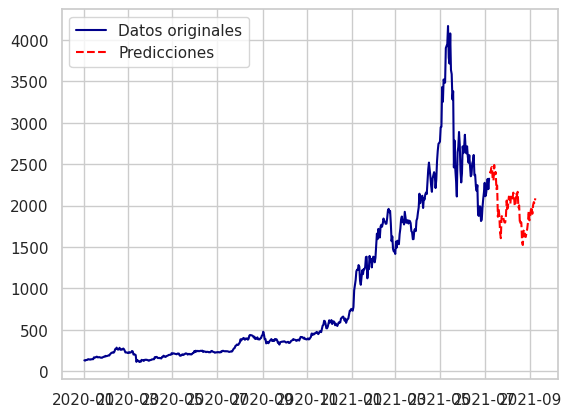

In [ ]:
# Ajustar modelo SARIMA en la escala logarítmica
mod2 = sm.tsa.SARIMAX(ETH_coint_select['Log'], seasonal_order=(1,1, 0, 30))
res2 = mod2.fit()

# Realizar predicciones en la escala logarítmica
pred_log = res2.predict(start='2021-07-07', end='2021-09-07')

# Inversión del logaritmo para obtener las predicciones en la escala original
pred = np.exp(pred_log)

# Graficar datos originales y predicciones en la escala original
fig, ax = plt.subplots()
ax.plot(ETH_coint_select['Close'].loc['2020-01-01':], label='Datos originales', color= 'darkblue')
ax.plot(pred.index, pred, linestyle='--', label='Predicciones', color= 'red')

plt.legend()
plt.show()

### Con la librería statsmodels y usando un modelo SARIMA(1, 1, 0, 30) obtenemos un buen pronóstico a espera de su evaluación y comparación con el primero modelo SARIMA(1, 0, 0, 30)

In [ ]:
print(res2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  553
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 30)   Log Likelihood                 645.669
Date:                            Tue, 23 May 2023   AIC                          -1285.338
Time:                                    03:59:16   BIC                          -1272.559
Sample:                                01-01-2020   HQIC                         -1280.333
                                     - 07-06-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9834      0.008    129.105      0.000       0.968       0.998
ar.S.L30      -0.4946      0.021   

### Observamos que el p-value , tanto del parámetro autoregresivo de orden 1 como el de orden 30 , tiene significancia para el modelo.
### Por otro lado las pruebas AIC = -1285.338, y BIC=-1272.559 , nos arrojan un valor menor que para el modelo SARIMA(1,0,0,30), además de contemplar un parámetro más y una diferencia, con lo cuál decidimos quedarnos con el modelo SARIMA(1,1,0,30) de statsmodels.

#EVALUACIÓN RESIDUOS

<Axes: ylabel='Density'>

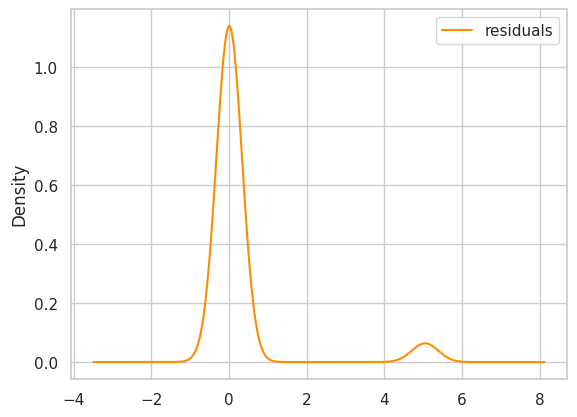

In [ ]:
# Crear DataFrame de los residuos del modelo ARIMA
residuals = pd.DataFrame(res2.resid, columns=['residuals'])
# Trazar la distribución de densidad de los residuos
residuals.plot(kind='kde', color='darkorange')

### Podemos ver que la distribución de los residuos se asemeja bastante a una normal con media 0 lo cuál es una buena señal para ver que los residuos son estacionarios.

In [ ]:
test_p_vale(residuals.dropna())

P-value 0.0008867498650105821
*------------------------------------------------------*
rechazar hipotesis nula, los datos son estacionales


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
PruebaLB = acorr_ljungbox(residuals)
PruebaLB['lb_pvalue']

1     1.469175e-114
2     2.095004e-218
3      0.000000e+00
4      0.000000e+00
5      0.000000e+00
6      0.000000e+00
7      0.000000e+00
8      0.000000e+00
9      0.000000e+00
10     0.000000e+00
Name: lb_pvalue, dtype: float64

### Por otro lado la prueba de Ljung Box nos dice si los residuos se están comportando como Ruido Blanco(WN)
###Los p-valores obtenidos de la prueba de Ljung-Box son muy pequeños, generalmente se interpreta como evidencia de autocorrelación significativa en los residuos. Esto significa que los residuos no se comportan como ruido blanco y hay patrones sistemáticos de dependencia temporal que no están siendo capturados por el modelo.

### Con ello decidimos usar un modelo multiplicativo SARIMA(4,1,0)(1,1,0,30) para contemplar 4 rezagos más y eliminar dicha correlación entre los residuos.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


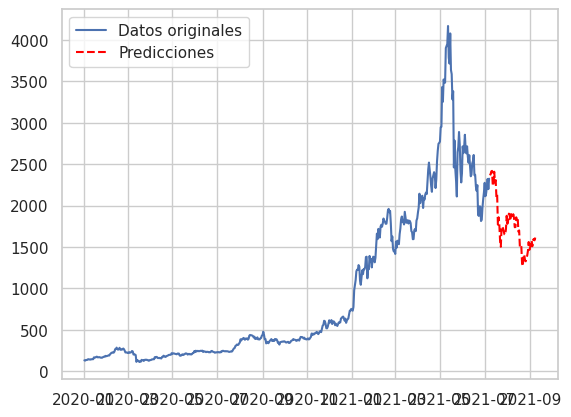

In [ ]:
# Ajustar modelo SARIMA en la escala logarítmica
mod3 = sm.tsa.SARIMAX(ETH_coint_select['Log'],order=(4,1,0), seasonal_order=(1,1, 0, 30))
res3 = mod3.fit()

# Realizar predicciones en la escala logarítmica
pred_log = res3.predict(start='2021-07-07', end='2021-09-07')

# Inversión del logaritmo para obtener las predicciones en la escala original
pred = np.exp(pred_log)

# Graficar datos originales y predicciones en la escala original
fig, ax = plt.subplots()
ax.plot(ETH_coint_select['Close'].loc['2020-01-01':], label='Datos originales')
ax.plot(pred.index, pred, color='red', linestyle='--', label='Predicciones')

plt.legend()
plt.show()

In [ ]:
print(res3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  553
Model:             SARIMAX(4, 1, 0)x(1, 1, 0, 30)   Log Likelihood                 652.256
Date:                            Tue, 23 May 2023   AIC                          -1292.512
Time:                                    03:59:20   BIC                          -1266.966
Sample:                                01-01-2020   HQIC                         -1282.506
                                     - 07-06-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1148      0.049     -2.351      0.019      -0.210      -0.019
ar.L2          0.0914      0.047   

### Obtenemos un AIC= -1292.512 y BIC=-1266.966 , siendo menores que el modelo SARIMA(1,1,0,30) propuesto anteriormente, por lo cuál obtuvimos un mejor modelo y pronóstico.

<Axes: ylabel='Density'>

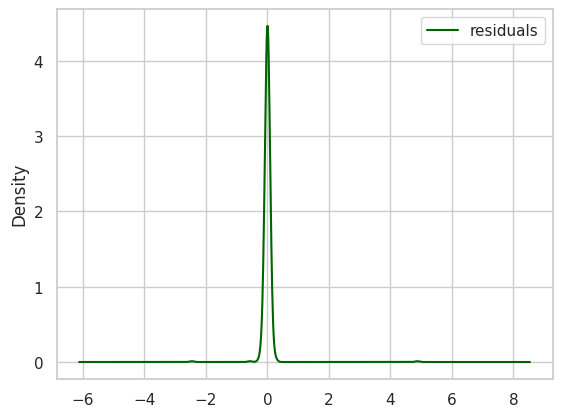

In [ ]:
# Crear DataFrame de los residuos del modelo ARIMA
residuals3 = pd.DataFrame(res3.resid, columns=['residuals'])
# Trazar la distribución de densidad de los residuos
residuals3.plot(kind='kde', color='darkgreen')

### El modelo mejoró ya que ya no se ve evidencia de autocorrelación entre rezagos,

In [ ]:
test_p_vale(residuals3.dropna())

P-value 0.0
*------------------------------------------------------*
rechazar hipotesis nula, los datos son estacionales


In [ ]:
PruebaLB = acorr_ljungbox(residuals3)
PruebaLB['lb_pvalue']

1     0.795891
2     0.942223
3     0.989443
4     0.998287
5     0.999748
6     0.999966
7     0.999983
8     0.999995
9     0.999998
10    0.999999
Name: lb_pvalue, dtype: float64

##Finalmente hicimos las pruebas de Dicky Fuller y Ljung-Box y obtuvimos que los residuos son estacionarios y además se comportan como Ruido Blanco(WN), por lo que podemos concluir que tenemos un modelo acertado y robusto para hacer el pronóstico de 2 meses.

#Explicación de resultados y medidas de desempeño del modelo


Comparamos nuestras predicciones con los precios reales del Enthereum en Agosto y Septiembre del 2021

In [ ]:
# Lee el archivo CSV
df = pd.read_csv('/content/cripto/ETH-USD.csv',parse_dates=['Date'])

# Establece la columna 'Date' como el índice del DataFrame
Eth_coin = df.set_index('Date')

# Ordena el DataFrame por el índice en orden ascendente
Eth_coin.sort_index(inplace=True)

# Muestra las primeras filas del DataFrame
Eth_coin.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-06,2197.919434,2346.294922,2197.919434,2324.679443,2324.679443,20891861314
2021-07-07,2323.208496,2403.773438,2298.026855,2315.161865,2315.161865,22398345285
2021-07-08,2317.949219,2324.006836,2089.414307,2120.026367,2120.026367,23188123689
2021-07-09,2115.573975,2185.376221,2051.066650,2146.692383,2146.692383,23029574602
2021-07-10,2146.999756,2190.124023,2081.923584,2111.403564,2111.403564,17581542471


In [ ]:
#Calculamos el Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Eth_coin['Close'], pred))
print('RMSE: ', rmse)

RMSE:  1313.26009645115


Observamos que a pesar de no tener un MAPE óptimo tenemos un 30% el cual indica un modelo "relativamente bueno".

Por otro lado tanto el MAPE y el RMSE no son tan bajos como lo deseariamos sin embargo debemos tener en cuenta que  la volatilidad e imprevisibilidad inherentes a los mercados de criptomonedas dificultan las predicciones precisas de precios.